# Logistic regression m sample



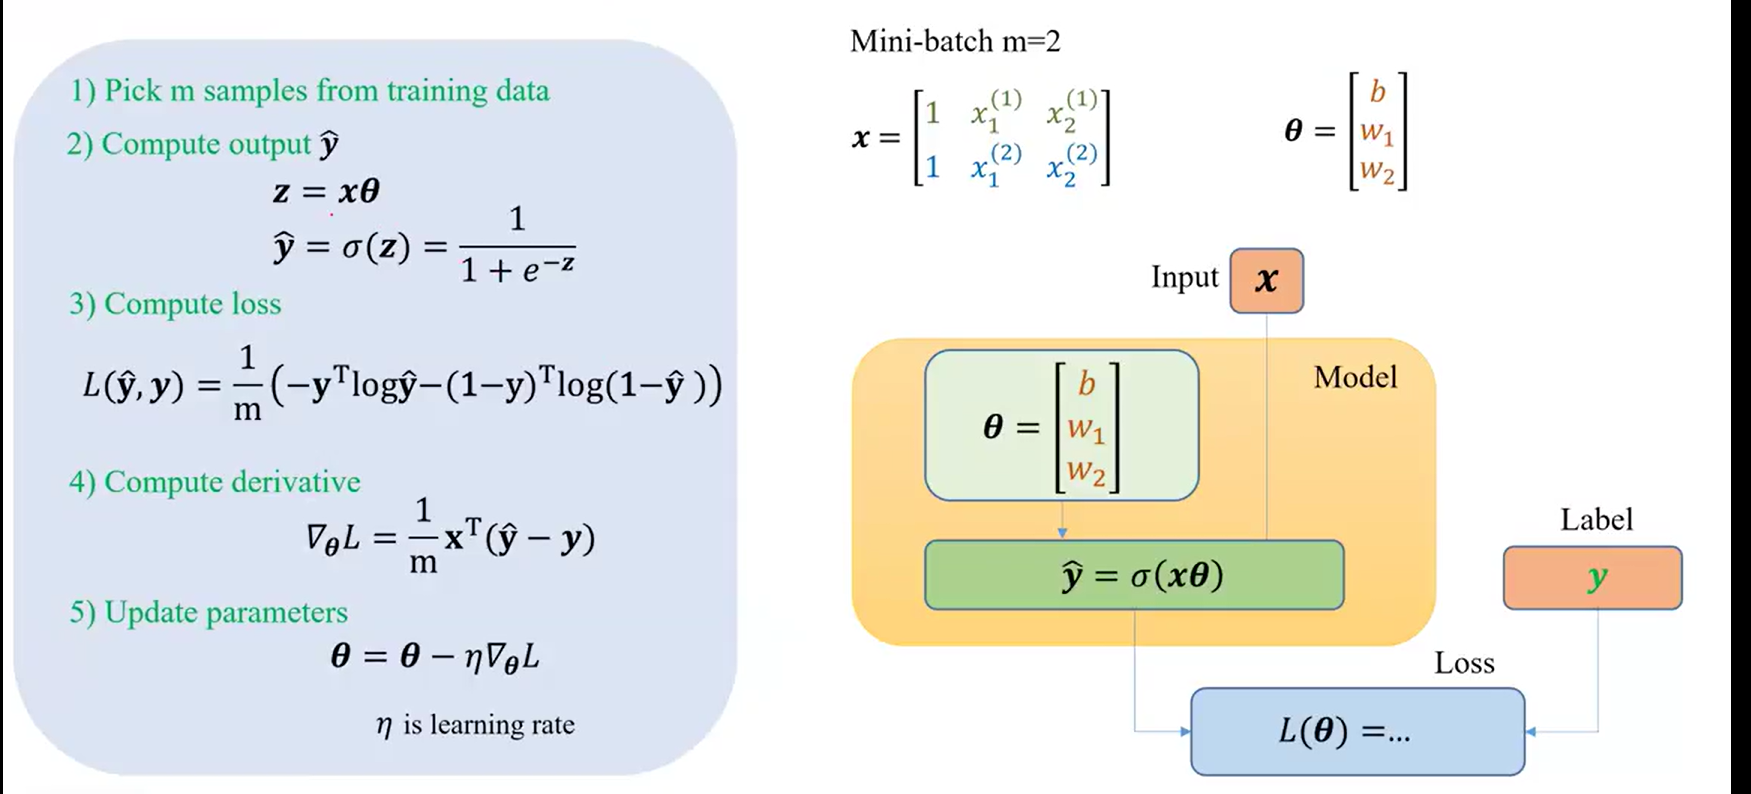

## import libraries

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset

In [263]:
df = pd.read_csv('iris_full.csv')
X_data = df.iloc[:, 0:4].values
X_data = np.hstack([np.ones((X_data.shape[0], 1)), X_data])
print(X_data[0])
y_data = df.iloc[:, -1].values
print("Shape of x: ",X_data.shape)
print("Shape of y: ",y_data.shape)
N = X_data.shape[0]
print("N: ", N)
m = 20

[1.  5.1 3.5 1.4 0.2]
Shape of x:  (100, 5)
Shape of y:  (100,)
N:  100


## Functions


In [264]:
def sigmoid_function(z):
    return 1 / (1+np.exp(-z))
def predict(X, theta):
    y_hat = sigmoid_function(X.dot(theta))
    return y_hat
def compute_loss(y_hat, y):
    loss = (-y.T.dot(np.log(y_hat)) - (1-y).T.dot((np.log(1-y_hat)))) / m
    return loss
def compute_gradient(x, y_hat, y):
    return x.T.dot(y_hat - y)/m
def update_weight(theta, gradient, lr):
    theta = theta - lr*gradient
    return theta

## Train

### Init parameters/ weights

In [265]:
lr = 0.1
epoch_max = 100
theta = np.array([0.1, 0.5, 0.1, 0.5, -0.1])    #theta = b , w1,w2 ...
losses = []
accs = []

### Train model

In [266]:
for i in range(epoch_max):
    # Xáo trộn data
    shuffled_indices = np.random.permutation(N)
    X_data_shuffled  = X_data[shuffled_indices]
    y_data_shuffled  = y_data[shuffled_indices]
    for i in range(0, N, m):
        xi = X_data_shuffled[i: i+m]
        yi = y_data_shuffled[i: i+m]

        # predict
        y_hat = predict(xi, theta)
        # compute loss
        loss = compute_loss(y_hat, yi)
        losses.append(loss)
        #compute gradient
        gradient = compute_gradient(xi, y_hat, yi)
        # update weights
        theta = update_weight(theta, gradient, lr)

## Visualize results

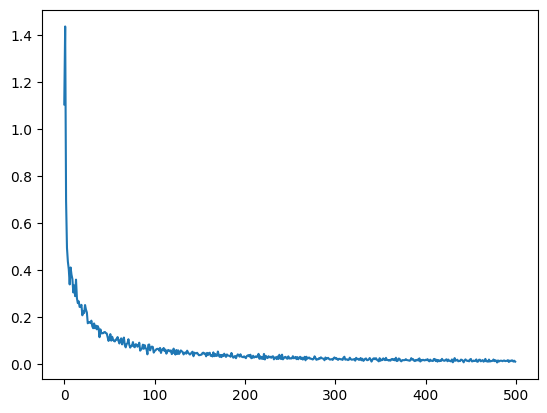

In [267]:
plt.plot(losses)